<a href="https://colab.research.google.com/github/Srii126/39_Srilakshmi/blob/main/LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git config --global user.name "Sruthi2502"
!git config --global user.email "keerthg"

In [1]:
# Install all necessary libraries
!pip install pandas scikit-learn matplotlib seaborn transformers kaggle --quiet


In [2]:
# List files in current directory
!ls


'archive (4).zip'   sample_data


# Task
The user wants to load the 'all-data.csv' dataset, prepare it for machine learning, train and evaluate a classical model (Logistic Regression), perform zero-shot classification using a HuggingFace transformer model, compare their performances, and conduct an error analysis on misclassified examples, finally summarizing the findings.

## Load and Explore Data

### Subtask:
Load the 'all-data.csv' dataset into a pandas DataFrame. This step will also display the first few rows, DataFrame information, and the distribution of sentiment labels to ensure correct loading and initial understanding of the data.


**Reasoning**:
The first step is to extract the `archive.zip` file to access the `all-data.csv` as per the instructions.



In [6]:
!unzip -o 'archive (4).zip'

Archive:  archive (4).zip
  inflating: FinancialPhraseBank/License.txt  
  inflating: FinancialPhraseBank/README.txt  
  inflating: FinancialPhraseBank/Sentences_50Agree.txt  
  inflating: FinancialPhraseBank/Sentences_66Agree.txt  
  inflating: FinancialPhraseBank/Sentences_75Agree.txt  
  inflating: FinancialPhraseBank/Sentences_AllAgree.txt  
  inflating: all-data.csv            


In [9]:
import pandas as pd

# Load the dataset, specifying encoding, separator, and header=None as it appears there's no header
df = pd.read_csv('all-data.csv', encoding='ISO-8859-1', sep=',', header=None)

# Manually assign column names
df.columns = ['sentiment', 'text']

print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Information:")
df.info()
print("\nDistribution of Sentiment Labels:")
print(df['sentiment'].value_counts())

First 5 rows of the DataFrame:
  sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB

Distribution of Sentiment Labels:
sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Map sentiment labels to numerical values
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])
print("Sentiment Label Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# 2. Split the dataset into training and testing sets
X = df['text']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for practicality
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nShape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Sentiment Label Mapping:
negative: 0
neutral: 1
positive: 2

Shape of X_train: (3876,)
Shape of X_test: (970,)
Shape of y_train: (3876,)
Shape of y_test: (970,)

Shape of X_train_tfidf: (3876, 5000)
Shape of X_test_tfidf: (970, 5000)


## Train and Evaluate Classical Model

### Subtask:
Train a Logistic Regression classifier on the TF-IDF vectorized training data. Evaluate the model's performance on the test set by generating a classification report and visualizing a confusion matrix.



Training Logistic Regression model...
Model training complete.

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.78      0.45      0.57       121
     neutral       0.76      0.92      0.83       576
    positive       0.70      0.52      0.60       273

    accuracy                           0.75       970
   macro avg       0.75      0.63      0.67       970
weighted avg       0.75      0.75      0.73       970



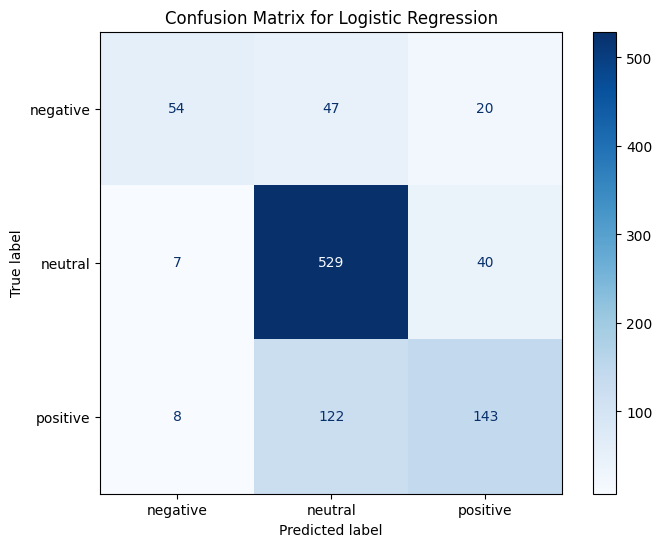

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
+
# 1. Initialize a Logistic Regression model
# Set max_iter to a sufficiently large number to ensure convergence
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the Logistic Regression model
print("\nTraining Logistic Regression model...")
log_reg_model.fit(X_train_tfidf, y_train)
print("Model training complete.")

# 3. Make predictions on the test set
y_pred = log_reg_model.predict(X_test_tfidf)

# 4. Print a classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 5. Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for Logistic Regression')
plt.show()

## LLM Zero-Shot Classification and Evaluation

### Subtask:
Load a pre-trained HuggingFace transformer model for zero-shot text classification. Apply this model to a sample of the test data to predict sentiment. Evaluate the LLM's performance by generating a classification report and visualizing its confusion matrix.


Candidate Labels for Zero-Shot Classification: ['negative', 'neutral', 'positive']

Initializing Zero-Shot Classification pipeline...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Pipeline initialized.

Making predictions with the LLM...
LLM predictions complete.

Classification Report for LLM Zero-Shot Classification:
              precision    recall  f1-score   support

    negative       0.43      0.98      0.60       121
     neutral       0.97      0.05      0.10       576
    positive       0.38      0.92      0.54       273

    accuracy                           0.41       970
   macro avg       0.59      0.65      0.41       970
weighted avg       0.73      0.41      0.28       970



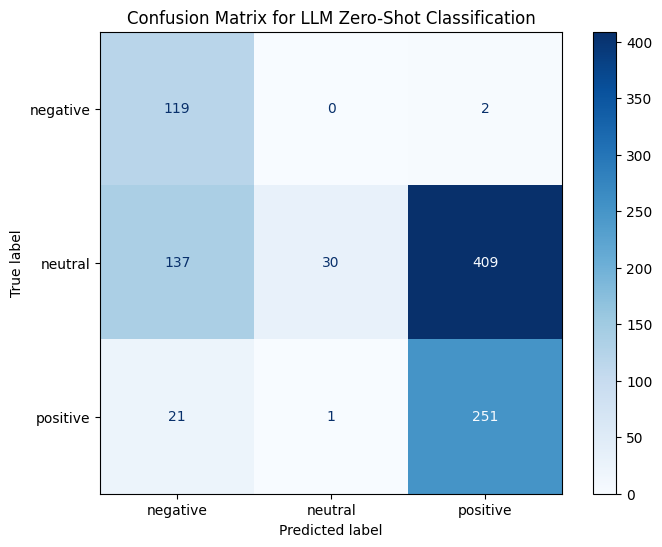

In [14]:
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Define candidate labels from the LabelEncoder classes
candidate_labels = le.classes_.tolist()
print(f"Candidate Labels for Zero-Shot Classification: {candidate_labels}")

# 2. Initialize a zero-shot classification pipeline
# Using 'facebook/bart-large-mnli' as specified
print("\nInitializing Zero-Shot Classification pipeline...")
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
print("Pipeline initialized.")

# 3. Apply the classifier to X_test to get predictions
# We will process in batches or iterate if batch processing directly on X_test Series is an issue
# The pipeline can directly take a list of strings
print("\nMaking predictions with the LLM...")
llm_raw_predictions = classifier(X_test.to_list(), candidate_labels=candidate_labels, multi_label=False)

# Extract the predicted labels (which are strings like 'negative', 'neutral', 'positive')
llm_predicted_labels = [pred['labels'][0] for pred in llm_raw_predictions]

# 4. Convert string labels from llm_predictions to numerical encoded values
llm_predictions_encoded = le.transform(llm_predicted_labels)

print("LLM predictions complete.")

# 5. Generate and print a classification report
print("\nClassification Report for LLM Zero-Shot Classification:")
print(classification_report(y_test, llm_predictions_encoded, target_names=le.classes_))

# 6. Generate and visualize the confusion matrix
cm_llm = confusion_matrix(y_test, llm_predictions_encoded)
fig, ax = plt.subplots(figsize=(8, 6))
disp_llm = ConfusionMatrixDisplay(confusion_matrix=cm_llm, display_labels=le.classes_)
disp_llm.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for LLM Zero-Shot Classification')
plt.show()

Candidate Labels for Zero-Shot Classification: ['negative', 'neutral', 'positive']

Initializing Zero-Shot Classification pipeline...


Device set to use cpu


Pipeline initialized.

Making predictions with the LLM...
LLM predictions complete.

Classification Report for LLM Zero-Shot Classification:
              precision    recall  f1-score   support

    negative       0.43      0.98      0.60       121
     neutral       0.97      0.05      0.10       576
    positive       0.38      0.92      0.54       273

    accuracy                           0.41       970
   macro avg       0.59      0.65      0.41       970
weighted avg       0.73      0.41      0.28       970



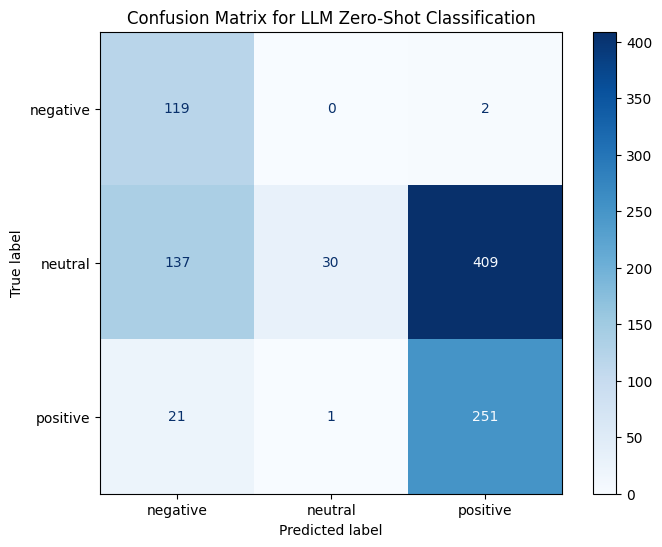

In [ ]:
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Define candidate labels from the LabelEncoder classes
candidate_labels = le.classes_.tolist()
print(f"Candidate Labels for Zero-Shot Classification: {candidate_labels}")

# 2. Initialize a zero-shot classification pipeline
# Using 'facebook/bart-large-mnli' as specified
print("\nInitializing Zero-Shot Classification pipeline...")
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
print("Pipeline initialized.")

# 3. Apply the classifier to X_test to get predictions
# We will process in batches or iterate if batch processing directly on X_test Series is an issue
# The pipeline can directly take a list of strings
print("\nMaking predictions with the LLM...")
llm_raw_predictions = classifier(X_test.to_list(), candidate_labels=candidate_labels, multi_label=False)

# Extract the predicted labels (which are strings like 'negative', 'neutral', 'positive')
llm_predicted_labels = [pred['labels'][0] for pred in llm_raw_predictions]

# 4. Convert string labels from llm_predictions to numerical encoded values
llm_predictions_encoded = le.transform(llm_predicted_labels)

print("LLM predictions complete.")

# 5. Generate and print a classification report
print("\nClassification Report for LLM Zero-Shot Classification:")
print(classification_report(y_test, llm_predictions_encoded, target_names=le.classes_))

# 6. Generate and visualize the confusion matrix
cm_llm = confusion_matrix(y_test, llm_predictions_encoded)

fig, ax = plt.subplots(figsize=(8, 6))
disp_llm = ConfusionMatrixDisplay(confusion_matrix=cm_llm, display_labels=le.classes_)
disp_llm.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for LLM Zero-Shot Classification')
plt.show()

In [15]:


import pandas as pd

# Reset index of y_test to align with X_test if needed
y_test_reset = y_test.reset_index(drop=True)

# 1. Create a pandas DataFrame to consolidate the test data, true labels, classical model predictions, and LLM predictions
error_analysis_df = pd.DataFrame({
    'text': X_test.reset_index(drop=True),
    'true_sentiment_encoded': y_test_reset,
    'classical_pred_encoded': y_pred,
    'llm_pred_encoded': llm_predictions_encoded
})

print("Consolidated DataFrame head:")
print(error_analysis_df.head())
print("\nConsolidated DataFrame info:")
error_analysis_df.info()

Consolidated DataFrame head:
                                                text  true_sentiment_encoded  \
0  Following the payment made in April , the comp...                       1   
1  The share subscription period for C options wi...                       1   
2  Aspocomp intends to set up a plant to manufact...                       1   
3  Finnish Rautaruukki has been awarded a contrac...                       2   
4  Finnish Bank of +_land reports its operating p...                       0   

   classical_pred_encoded  llm_pred_encoded  
0                       1                 2  
1                       1                 0  
2                       1                 2  
3                       2                 2  
4                       0                 0  

Consolidated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                 

In [ ]:
import numpy as np

# 2. Identify indices where both classical and LLM predictions are incorrect
misclassified_by_classical = (error_analysis_df['true_sentiment_encoded'] != error_analysis_df['classical_pred_encoded'])
misclassified_by_llm = (error_analysis_df['true_sentiment_encoded'] != error_analysis_df['llm_pred_encoded'])

doubly_misclassified_indices = error_analysis_df[misclassified_by_classical & misclassified_by_llm].index

# 3. Create a new DataFrame for doubly misclassified examples
doubly_misclassified_df = error_analysis_df.loc[doubly_misclassified_indices].copy()

# 4. Map numerical encoded sentiments back to original labels
doubly_misclassified_df['true_sentiment'] = le.inverse_transform(doubly_misclassified_df['true_sentiment_encoded'])
doubly_misclassified_df['classical_pred_sentiment'] = le.inverse_transform(doubly_misclassified_df['classical_pred_encoded'])
doubly_misclassified_df['llm_pred_sentiment'] = le.inverse_transform(doubly_misclassified_df['llm_pred_encoded'])

# Reorder columns for better readability
doubly_misclassified_df = doubly_misclassified_df[['text', 'true_sentiment', 'classical_pred_sentiment', 'llm_pred_sentiment']]

print(f"Number of examples misclassified by BOTH models: {len(doubly_misclassified_df)}")

# 5. Print the first few rows (e.g., 10) of this DataFrame
print("\nFirst 10 examples misclassified by BOTH classical and LLM models:")
print(doubly_misclassified_df.head(10))

Number of examples misclassified by BOTH models: 60

First 10 examples misclassified by BOTH classical and LLM models:
                                                  text true_sentiment  \
36   After non-recurring items of EUR 177mn , profi...        neutral   
45   Paper maker Stora Enso Oyj said Friday it has ...       positive   
69   Affecto has helped SKAT to set up the platform...        neutral   
82   To choose BasWare as the tools for our Financi...        neutral   
88   The company will also shut one paper machine i...        neutral   
106  Marathon now has a 4.6 percent stake in PLX , ...        neutral   
136  Rautakesko 's business operations in Norway an...        neutral   
141  The corresponding increase in the share capita...        neutral   
160  The order consists of capacity expansion , mai...        neutral   
180  Homeowners across North America have green exp...        neutral   

    classical_pred_sentiment llm_pred_sentiment  
36                  negativ